In [1]:
import os
import json

In [4]:
kp2017_train_file = 'annotations/person_keypoints_train2017.json'

In [5]:
with open(kp2017_train_file) as file:
    data = json.load(file)

Cấu trúc của file json:

In [6]:
data.keys()

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

images là dữ liệu ảnh. Đây là ảnh màu và có kích thước khác nhau

In [7]:
images = data['images']
len(images)

118287

In [8]:
images[0]

{'license': 3,
 'file_name': '000000391895.jpg',
 'coco_url': 'http://images.cocodataset.org/train2017/000000391895.jpg',
 'height': 360,
 'width': 640,
 'date_captured': '2013-11-14 11:18:45',
 'flickr_url': 'http://farm9.staticflickr.com/8186/8119368305_4e622c8349_z.jpg',
 'id': 391895}

Trong images có chứa link của ảnh có thể dùng để download. Tuy nhiên download file zip sẽ nhanh hơn

annotations là nhãn của bộ dữ liệu

In [11]:
anno = data['annotations']
len(anno)

262465

Cấu trúc của annotation:<br>
* segmentation: đường bao vật thể(con người)
* num_keypoints: số keypoint trong ảnh. Trong bộ dữ liệu này có tổng cộng 17 keypoints
* keypoints: biểu diễn theo bộ ba (x, y, z): x, y là tọa độ <br>
z = 0 ứng với keypoint không có trong ảnh<br>
z = 1 keypoint đã bị che mất<br>
z = 2 keypoint có hiển thị trên ảnh
* image_id: ứng với id của images

In [12]:
anno[0]

{'segmentation': [[267.03,
   243.78,
   314.59,
   154.05,
   357.84,
   136.76,
   374.05,
   104.32,
   410.81,
   110.81,
   429.19,
   131.35,
   420.54,
   165.95,
   451.89,
   209.19,
   464.86,
   240.54,
   480,
   253.51,
   484.32,
   263.24,
   496.22,
   271.89,
   484.32,
   278.38,
   438.92,
   257.84,
   401.08,
   216.76,
   370.81,
   247.03,
   414.05,
   277.3,
   433.51,
   304.32,
   443.24,
   323.78,
   400,
   362.7,
   376.22,
   375.68,
   400,
   418.92,
   394.59,
   424.32,
   337.3,
   382.16,
   337.3,
   371.35,
   388.11,
   327.03,
   341.62,
   301.08,
   311.35,
   276.22,
   304.86,
   263.24,
   294.05,
   249.19]],
 'num_keypoints': 8,
 'area': 28292.08625,
 'iscrowd': 0,
 'keypoints': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  325,
  160,
  2,
  398,
  177,
  2,
  0,
  0,
  0,
  437,
  238,
  2,
  0,
  0,
  0,
  477,
  270,
  2,
  287,
  255,
  1,
  339,
  267,
  2,
  0,
  0,
  0,
  423,
  314,
  2,
  0,
  0,
 

Với mỗi ảnh có thể có hoặc không có người xuất hiện trong đó

Categories chứa tên của keypoints và các cặp keypoints có thể nối được với nhau

In [15]:
categories = data['categories'][0]
categories

{'supercategory': 'person',
 'id': 1,
 'name': 'person',
 'keypoints': ['nose',
  'left_eye',
  'right_eye',
  'left_ear',
  'right_ear',
  'left_shoulder',
  'right_shoulder',
  'left_elbow',
  'right_elbow',
  'left_wrist',
  'right_wrist',
  'left_hip',
  'right_hip',
  'left_knee',
  'right_knee',
  'left_ankle',
  'right_ankle'],
 'skeleton': [[16, 14],
  [14, 12],
  [17, 15],
  [15, 13],
  [12, 13],
  [6, 12],
  [7, 13],
  [6, 7],
  [6, 8],
  [7, 9],
  [8, 10],
  [9, 11],
  [2, 3],
  [1, 2],
  [1, 3],
  [2, 4],
  [3, 5],
  [4, 6],
  [5, 7]]}

In [16]:
images.sort(key = lambda img:img['id'])
anno.sort(key = lambda ann: ann['image_id'])

Thống kê số người xuất hiện trong bức ảnh:

In [17]:
person_count = {}
x = 0
y = 0
# images and anno are 1 - N relationship
count = 0
while True:
    if images[x]['id'] == anno[y]['image_id']:
        count += 1
        y += 1
    else:
        person_count[count] = person_count.get(count, 0) + 1
        count = 0
        x += 1
    if y == len(anno):
        person_count[count] = person_count.get(count, 0) + 1
        person_count[0] = person_count.get(0, 0) + len(images) - x - 1
        break

In [18]:
import collections
import matplotlib.pyplot as plt

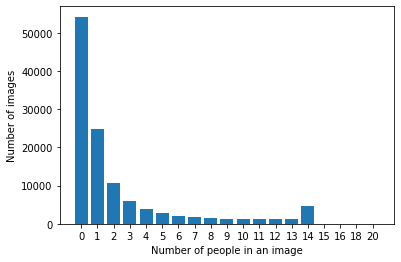

In [19]:
person_count = collections.OrderedDict(sorted(person_count.items()))
plt.bar(range(len(person_count)), list(person_count.values()), align='center')
plt.xticks(range(len(person_count)), list(person_count.keys()))
plt.xlabel('Number of people in an image')
plt.ylabel('Number of images')
plt.show()

Thống kê số lượng keypoint


In [23]:
kp_count = {}
for i in categories['keypoints']:
    kp_count[i] = 0
for ann in anno:
    for i in range(17):
        if ann['keypoints'][i * 3 + 2]:
            kp_count[categories['keypoints'][i]] += 1

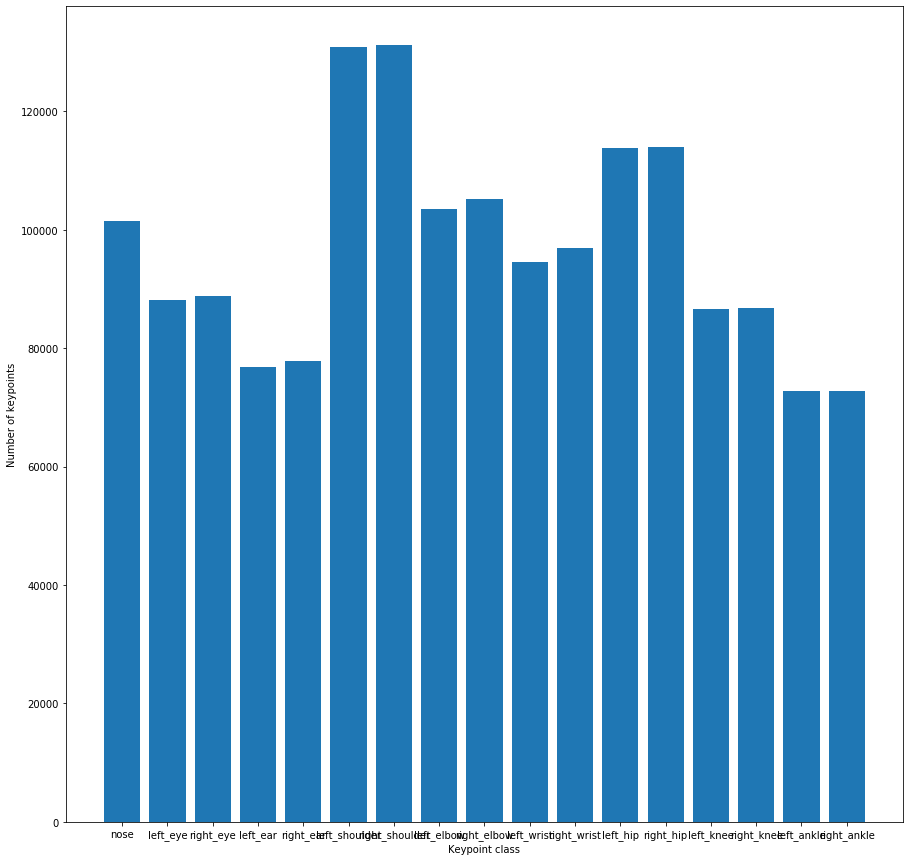

In [25]:
fig=plt.figure(figsize=(15, 15))
plt.bar(range(len(kp_count)), list(kp_count.values()), align='center')
plt.xticks(range(len(kp_count)), list(kp_count.keys()))
plt.xlabel('Keypoint class')
plt.ylabel('Number of keypoints')
plt.show()

In [45]:
import numpy as np
import cv2

In [47]:
idx = np.random.randint(len(images))

In [48]:
images[idx]

{'license': 2,
 'file_name': '000000426343.jpg',
 'coco_url': 'http://images.cocodataset.org/train2017/000000426343.jpg',
 'height': 480,
 'width': 640,
 'date_captured': '2013-11-21 23:22:49',
 'flickr_url': 'http://farm1.staticflickr.com/207/495745135_7bb0754e67_z.jpg',
 'id': 426343}

In [51]:
img = cv2.imread('images/{}'.format(images[idx]['file_name']))

TypeError: 'int' object is not iterable

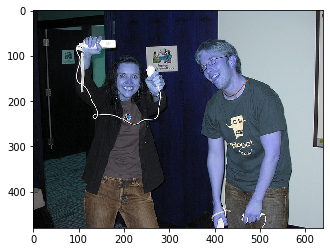

In [53]:
plt.imshow(img)
for ann in rangelen(anno):
    if ann['image_id'] == images[idx]['id']:
        keypoints = ann['keypoints']
        for i in range(17):
            if keypoints[i * 3 + 2]:
                plt.plot(keypoints[i * 3], keypoints[i * 3 + 1], marker='o', color='red', markersize=2)
        
        for pair in categories['skeleton']:
            if (keypoints[pair[0] * 3 - 1] and keypoints[pair[1] * 3 - 1]):
                plt.plot([keypoints[pair[0] * 3 - 3], keypoints[pair[1] * 3 - 3]],
                         [keypoints[pair[0] * 3 - 2], keypoints[pair[1] * 3 - 2]],
                         color='green')
plt.show()